In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, Dense, Flatten, Dropout


In [4]:
import numpy as np
import pandas as pd

# get the features from the file features.txt
features = list()
with open(r"C:\Users\asus\OneDrive\Documents\PROJECTS\MINOR_2023_1st\UCI  HAR  Dataset\features.txt") as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


In [ ]:
# get the data from txt files to pandas dataffame
X_train = pd.read_csv(r"C:\Users\asus\Downloads\Ho_gayaaaaaaaaaaaaa\UCI  HAR  Dataset\train\X_train.txt", delim_whitespace=True, header=None)
X_train.columns = [features]
# add subject column to the dataframe
X_train['subject'] = pd.read_csv(r"C:\Users\asus\Downloads\Ho_gayaaaaaaaaaaaaa\UCI  HAR  Dataset\train\subject_train.txt", header=None, squeeze=True)

y_train = pd.read_csv(r"C:\Users\asus\Downloads\Ho_gayaaaaaaaaaaaaa\UCI  HAR  Dataset\train\y_train.txt", names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample(2)

In [ ]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv(r"C:\Users\asus\Downloads\Ho_gayaaaaaaaaaaaaa\UCI  HAR  Dataset\test\X_test.txt", delim_whitespace=True, header=None)
X_test.columns = [features]
# add subject column to the dataframe
X_test['subject'] = pd.read_csv(r"C:\Users\asus\Downloads\Ho_gayaaaaaaaaaaaaa\UCI  HAR  Dataset\test\subject_test.txt", header=None, squeeze=True)

y_test = pd.read_csv(r"C:\Users\asus\Downloads\Ho_gayaaaaaaaaaaaaa\UCI  HAR  Dataset\test\y_test.txt", names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample(2)

In [ ]:
train.to_csv('train.csv',index=False)

test.to_csv('test.csv',index=False)


In [7]:
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [8]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [9]:
# # assuming y_train and y_test are pandas Series objects
# y_train = np.repeat(y_train.to_numpy().reshape(y_train.shape[0], 1), X_train.shape[1], axis=1)
# y_test = np.repeat(y_test.to_numpy().reshape(y_test.shape[0], 1), y_test.shape[1], axis=1)

In [10]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

C:\Users\asus\AppData\Local\Temp\ipykernel_24936\71913079.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[()]','')
C:\Users\asus\AppData\Local\Temp\ipykernel_24936\71913079.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[-]', '')
C:\Users\asus\AppData\Local\Temp\ipykernel_24936\71913079.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[,]','')


Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

In [5]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# function to print the confusion matrix

def confusion_matrix(Y_true, Y_pred):
    
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

    
   # result = confusion_matrix(Y_true, Y_pred)

    #plt.figure(figsize=(10, 8))
   # sns.heatmap(result, 
    #            xticklabels= list(ACTIVITIES.values()), 
     #           yticklabels=list(ACTIVITIES.values()), 
      #          annot=True, fmt="d");
   # plt.title("Confusion matrix")
   # plt.ylabel('True label')
   # plt.xlabel('Predicted label')
    plt.show()

In [7]:
# Data directory
DATADIR = 'UCI_HAR_Dataset'

# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
    ]

In [8]:
# function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = fr'C:\Users\asus\OneDrive\Documents\PROJECTS\MINOR_2023_1st\UCI  HAR  Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).to_numpy()
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [9]:
def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = fr'C:\Users\asus\OneDrive\Documents\PROJECTS\MINOR_2023_1st\UCI  HAR  Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).to_numpy()

In [10]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

In [11]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

In [12]:
# Initializing parameters
epochs = 100
batch_size = 16
n_hidden = 32

In [13]:
#function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [14]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

In [15]:
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train : ",Y_train.shape)
print("y_test : ",Y_test.shape)

X_train :  (7352, 128, 9)
X_test :  (2947, 128, 9)
y_train :  (7352, 6)
y_test :  (2947, 6)


In [16]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


In [17]:
# y_train = pd.get_dummies(y_train.squeeze()).values
# y_test = pd.get_dummies(y_test.squeeze()).values

# # Reshape the data for the CNN layer
# X_train = X_train.reshape(-1, 128, 9)
# X_test = X_test.reshape(-1, 128, 9)

# # Define the model
# model = Sequential()
# model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(128, 9)))
# model.add(MaxPooling1D(pool_size=2))
# model.add(GRU(32))
# model.add(Dense(6, activation='softmax'))



In [24]:
from keras.callbacks import EarlyStopping

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, Dropout, Dense

# Define the CNN-GRU model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(GRU(64, return_sequences=True))
model.add(Dropout(0.5))
model.add(GRU(64))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=batch_size,callbacks=[early_stopping])


Epoch 1/100
460/460 [==============================] - 26s 44ms/step - loss: 0.5685 - accuracy: 0.7635 - val_loss: 0.4372 - val_accuracy: 0.8483
Epoch 2/100
460/460 [==============================] - 18s 39ms/step - loss: 0.1780 - accuracy: 0.9374 - val_loss: 0.3997 - val_accuracy: 0.8860
Epoch 3/100
460/460 [==============================] - 17s 38ms/step - loss: 0.1401 - accuracy: 0.9494 - val_loss: 0.2695 - val_accuracy: 0.9087
Epoch 4/100
460/460 [==============================] - 18s 39ms/step - loss: 0.1388 - accuracy: 0.9476 - val_loss: 0.3151 - val_accuracy: 0.9053
Epoch 5/100
460/460 [==============================] - 20s 44ms/step - loss: 0.1272 - accuracy: 0.9482 - val_loss: 0.2648 - val_accuracy: 0.9118
Epoch 6/100
460/460 [==============================] - 24s 53ms/step - loss: 0.1237 - accuracy: 0.9495 - val_loss: 0.3338 - val_accuracy: 0.9084
Epoch 7/100
460/460 [==============================] - 22s 48ms/step - loss: 0.1192 - accuracy: 0.9517 - val_loss: 0.3472 - val_ac

In [26]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


93/93 [==============================] - 1s 10ms/step - loss: 0.2869 - accuracy: 0.9108
Test loss: 0.2868861258029938
Test accuracy: 0.9107567071914673


In [27]:
from sklearn.metrics import classification_report

# Get the predicted class probabilities for the test set
y_pred_prob = model.predict(X_test)

# Get the predicted classes
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert the one-hot encoded labels back to their original form
y_true = np.argmax(Y_test, axis=1)

# Print the classification report
print(classification_report(y_true, y_pred))

93/93 [==============================] - 2s 11ms/step
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       496
           1       0.99      0.94      0.96       471
           2       0.89      0.97      0.93       420
           3       0.84      0.75      0.79       491
           4       0.80      0.86      0.83       532
           5       0.99      1.00      1.00       537

    accuracy                           0.91      2947
   macro avg       0.91      0.91      0.91      2947
weighted avg       0.91      0.91      0.91      2947



93/93 [==============================] - 1s 10ms/step


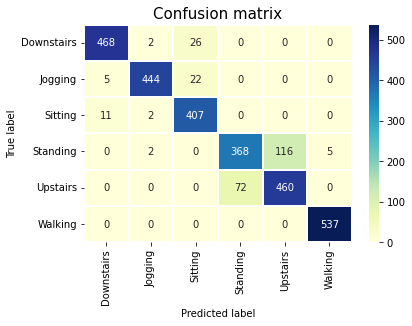

In [28]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
predictions = model.predict(X_test)
class_labels = ['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs', 'Walking']
max_test = np.argmax(Y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)
sns.heatmap(confusion_matrix, xticklabels = class_labels, yticklabels = class_labels, annot = True, linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()